In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv', index_col=0, parse_dates=True)

df['AvgPrice'] = df[[ 'Close']].mean(axis=1)

# Extract the year from the index
df['Year'] = df.index.year

yearly_avg_price = df.groupby('Year')['AvgPrice'].mean()

print(yearly_avg_price)


Year
2010     6.692125
2011     8.376375
2012     8.011529
2013    10.776237
2014    13.479044
2015    17.313799
2016    21.774487
2017    24.060366
2018    29.106692
2019    31.657083
2020    39.437168
2021    58.461204
2022    58.316274
2023    53.889394
2024    63.939127
Name: AvgPrice, dtype: float64


In [23]:
yearly_avg_price.to_csv("yearly_avg_price.csv")

Predicted average price for 2025: 74.49


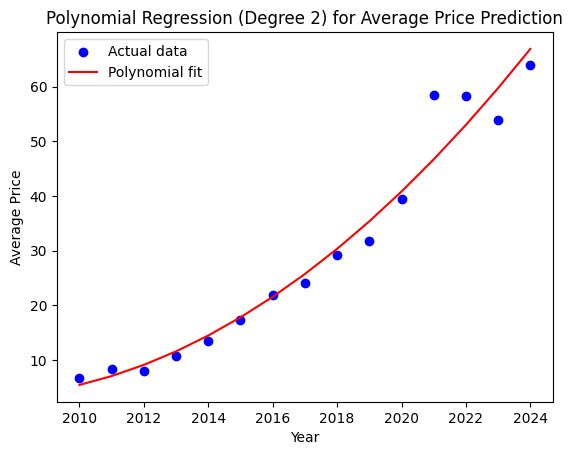

In [24]:
X = yearly_avg_price.index.values.reshape(-1, 1)
y = yearly_avg_price.values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

next_year = np.array([[2025]])
next_year_poly = poly.transform(next_year)
predicted_price = model.predict(next_year_poly)

print(f"Predicted average price for 2025: {predicted_price[0]:.2f}")

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial fit')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Polynomial Regression (Degree 2) for Average Price Prediction')
plt.legend()
plt.show()


In [25]:

# Resample by week and calculate the average 'Close' price of the week
weekly_avg_close = df['Close'].resample('W').mean()

# Convert to period format (Year-Week)
weekly_avg_close.index = weekly_avg_close.index.to_period('W')

# Extract Year and Week from the Period index
weekly_avg_close_df = pd.DataFrame({
    'Year': weekly_avg_close.index.year,
    'Week': weekly_avg_close.index.week,
    'Average Price': weekly_avg_close.values
})

# Display the result
print(weekly_avg_close_df)


     Year  Week  Average Price
0    2010     1       6.738667
1    2010     2       6.716000
2    2010     3       6.502000
3    2010     4       6.068667
4    2010     5       6.214667
..    ...   ...            ...
771  2024    42      73.682001
772  2024    43      74.486002
773  2024    44      75.003999
774  2024    45      77.081999
775  2024    46      79.395000

[776 rows x 3 columns]


In [26]:
weekly_avg_close.to_csv("weekly_avg_close.csv")

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
df=pd.read_csv("weekly_avg_close.csv")




In [28]:
df.columns

Index(['Unnamed: 0', 'Close'], dtype='object')

In [29]:
df.head()

,Unnamed: 0,Close
0,2010-01-04/2010-01-10,6.738667
1,2010-01-11/2010-01-17,6.716000
2,2010-01-18/2010-01-24,6.502000
3,2010-01-25/2010-01-31,6.068667
4,2010-02-01/2010-02-07,6.214667


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Extract year and week from the 'Date' column
df['Year'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.year
df['Week'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.isocalendar().week

# Feature matrix (X) and target vector (y)
X = df[['Year', 'Week']]
y = df['Close']




In [33]:
X = df[['Year', 'Week']]
y = df['Close']

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [50]:
X.head()

,Year,Week
0,2010,1
1,2010,2
2,2010,3
3,2010,4
4,2010,5


In [51]:
y.head()

0    6.738667
1    6.716000
2    6.502000
3    6.068667
4    6.214667
Name: Close, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
abs_r2 = mean_absolute_error(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Abs R-squared Score:", abs_r2)


Mean Squared Error: 22.683417708631037
R-squared Score: 0.9433287950886907
Abs R-squared Score: 3.1151923772517875


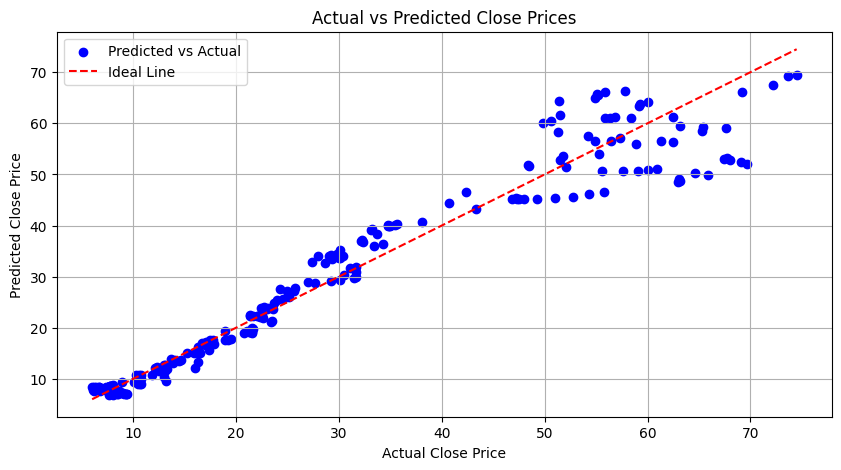

In [36]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()



    Year  Week  Predicted Close
0   2024    47        70.853642
1   2024    48        71.172394
2   2024    49        71.485078
3   2024    50        71.791008
4   2024    51        72.089498
5   2024    52        72.379865
6   2025     1        66.001900
7   2025     2        65.860954
8   2025     3        65.746290
9   2025     4        65.657223
10  2025     5        65.593067
11  2025     6        65.553138
12  2025     7        65.536748
13  2025     8        65.543214
14  2025     9        65.571850
15  2025    10        65.621970
16  2025    11        65.692890
17  2025    12        65.783923
18  2025    13        65.894385
19  2025    14        66.023589
20  2025    15        66.170851
21  2025    16        66.335486
22  2025    17        66.516807
23  2025    18        66.714130
24  2025    19        66.926769
25  2025    20        67.154039
26  2025    21        67.395254
27  2025    22        67.649729
28  2025    23        67.916779
29  2025    24        68.195719
30  2025

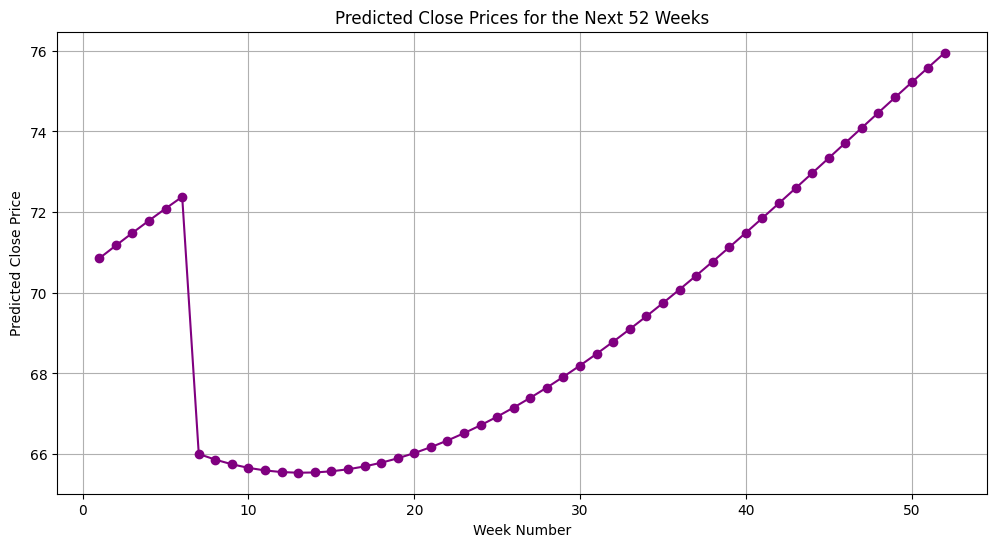

In [52]:
latest_year = df['Year'].iloc[-1]
latest_week = df['Week'].iloc[-1]

future_weeks = []
for i in range(1, 53):
    if latest_week + i > 52:
        year = latest_year + ((latest_week + i) // 52)
        week = (latest_week + i) % 52
    else:
        year = latest_year
        week = latest_week + i
    if week == 0:
        week = 52
        year -= 1
    future_weeks.append([year, week])

future_weeks_df = pd.DataFrame(future_weeks, columns=['Year', 'Week'])
future_weeks_poly = poly.transform(future_weeks_df)
future_predictions = model.predict(future_weeks_poly)

# Add predictions to DataFrame
future_weeks_df['Predicted Close'] = future_predictions

# Print future predictions
print(future_weeks_df)

# Plot predicted values for the next 52 weeks
plt.figure(figsize=(12, 6))
plt.plot(range(1, 53), future_predictions, marker='o', linestyle='-', color='purple')
plt.title('Predicted Close Prices for the Next 52 Weeks')
plt.xlabel('Week Number')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.show()

In [ ]:
future_weeks_df['Predicted Close'].values.mean()

<function ndarray.mean>